## FAST UNIVARIATE TIME-SERIES CLASSIFICATION

This notebook explores the classification of univariate time-series data by three methods:
- Via Tabularization + RandomForest
- Via Feature Extraction + RandomForest
- Direct univariate + ROCKET
- ROCKET Multivariate

### Dependencies

In [1]:
!pip install sktime --quiet
!pip install sktime[all_extras] --quiet
!pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.4/661.4 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.1 MB/s eta 0:

In [ ]:
# In colab you must restart your runtime before executng next cells!
import os
os.kill(os.getpid(), 9)

### Install Main Library and Import Methods

In [1]:
# Install Multivariate-Time-Series-Classification
!git clone https://github.com/LaverdeS/Multivariate-Time-Series-Classification.git --depth=1

Cloning into 'Multivariate-Time-Series-Classification'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 65 (delta 7), reused 44 (delta 4), pack-reused 0
Unpacking objects: 100% (65/65), 22.59 MiB | 3.42 MiB/s, done.


In [2]:
import numpy as np
import pandas as pd

import logging
from importlib import reload
reload(logging)

%cd Multivariate-Time-Series-Classification
from python.visualizing import show_confusion_matrix
from python.classifying import BinaryTimeSeriesClassifier

logging.basicConfig(level=logging.INFO)

/content/Multivariate-Time-Series-Classification


INFO:numba.cuda.cudadrv.driver:init
ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


### Data and Pre-processing

In [3]:
ts_classifier = BinaryTimeSeriesClassifier(data_path='sample-data/tinder/tinder-mad-removal-ml-ready.csv', label_column='rating', method='tabularization', multi=False)
display(ts_classifier.data)
ts_classifier.data.rating.value_counts()

INFO:root:number of samples: 164


,pupil_dilation,relative_pupil_dilation,rating
3,"[-2.2888, -2.2788, -2.2632, -2.2987, -2.404, -...","[-2.2795, -2.27, -2.2548, -2.2852, -2.3811, -2...",1
4,"[-2.1781, -2.1964, -2.2319, -2.2519, -2.2686, ...","[-2.1781, -2.1965, -2.2319, -2.252, -2.2686, -...",0
10,"[-1.9984, -1.9984, -2.0528, -2.1297, -2.2229, ...","[-2.001, -2.001, -2.0556, -2.1329, -2.2259, -2...",0
20,"[-2.5618, -2.6242, -2.6387, -2.5756, -2.541, -...","[-2.5617, -2.6241, -2.6387, -2.5756, -2.5409, ...",0
21,"[-2.934, -2.934, -2.8493, -2.8296, -2.8168, -2...","[-2.9351, -2.9351, -2.8492, -2.8295, -2.8167, ...",0
23,"[-1.6948, -1.7592, -1.7856, -1.8426, -1.9203, ...","[-1.6943, -1.7596, -1.786, -1.8422, -1.9206, -...",1
25,"[-0.4227, -0.399, -0.408, -0.368, -0.3402, -0....","[-0.4158, -0.3918, -0.4001, -0.3612, -0.3322, ...",0
28,"[-0.304, -0.2809, -0.2722, -0.2405, -0.086, 0....","[-0.1701, -0.1449, -0.1348, -0.1045, 0.0299, 0...",0
29,"[-2.7468, -2.7468, -2.3802, -2.1727, -2.0791, ...","[-3.5181, -3.5181, -3.1144, -2.8032, -2.6333, ...",1
43,"[-1.3104, -1.4333, -1.4448, -1.3788, -1.4118, ...","[-1.3107, -1.4335, -1.4451, -1.3783, -1.412, -...",0


1    22
0    19
Name: rating, dtype: int64

In [4]:
ts_classifier.build_training_data(X_column='relative_pupil_dilation')
ts_classifier.X

,relative_pupil_dilation
3,0 -2.2795 1 -2.2700 2 -2.2548 3 ...
4,0 -2.1781 1 -2.1965 2 -2.2319 3 ...
10,0 -2.0010 1 -2.0010 2 -2.0556 3 ...
20,0 -2.5617 1 -2.6241 2 -2.6387 3 ...
21,0 -2.9351 1 -2.9351 2 -2.8492 3 ...
23,0 -1.6943 1 -1.7596 2 -1.7860 3 ...
25,0 -0.4158 1 -0.3918 2 -0.4001 3 ...
28,0 -0.1701 1 -0.1449 2 -0.1348 3 ...
29,0 -3.5181 1 -3.5181 2 -3.1144 3 ...
43,0 -1.3107 1 -1.4335 2 -1.4451 3 ...


In [5]:
ts_classifier.y

3      1
4      0
10     0
20     0
21     0
23     1
25     0
28     0
29     1
43     0
45     0
46     0
48     0
52     1
53     1
54     1
55     0
56     1
57     0
62     0
64     0
67     1
70     1
72     0
75     1
76     1
78     0
86     0
90     1
94     1
95     1
96     1
97     1
98     1
103    1
104    1
105    1
106    1
111    0
112    0
114    1
Name: rating, dtype: object

In [6]:
ts_classifier.save_training_data(filename="tabularization-train.csv")

### Classifiers

#### Tabularization

INFO:root:number of samples per class: 19
INFO:root:tuning to obtain the best model (method: tabularization, k_folds: 5)...
INFO:root:fold: 1
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


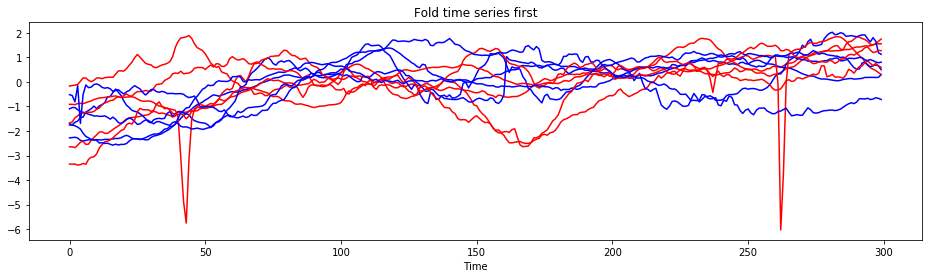

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.75
INFO:root:fold: 2
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


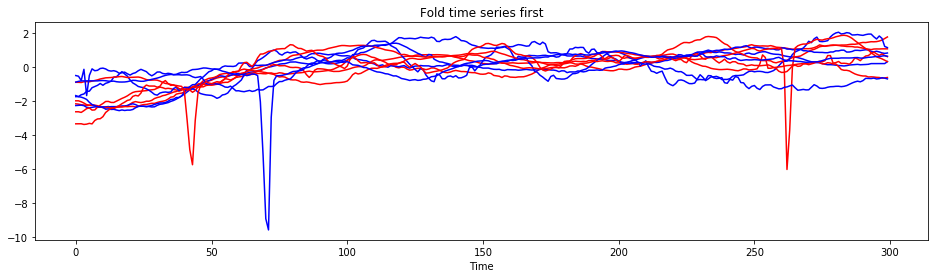

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.5
INFO:root:fold: 3
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


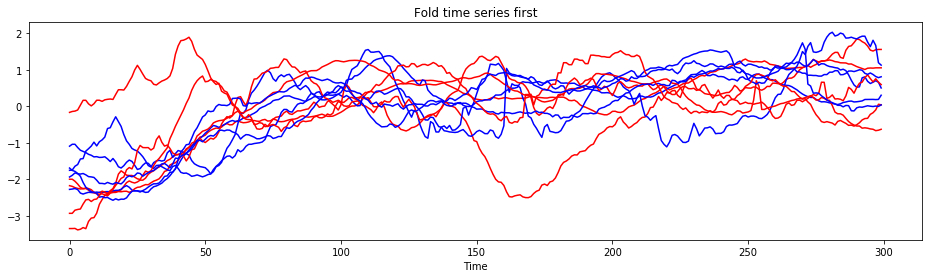

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.25
INFO:root:fold: 4
INFO:root:(array(['0', '1'], dtype=object), array([15, 16]))
INFO:root:displaying first 5 samples for each class


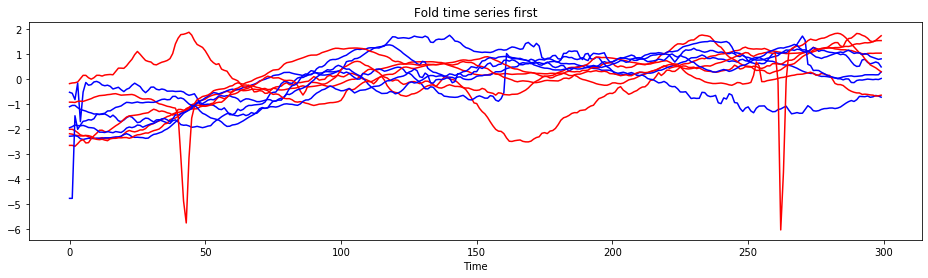

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.42857142857142855
INFO:root:fold: 5
INFO:root:(array(['0', '1'], dtype=object), array([16, 15]))
INFO:root:displaying first 5 samples for each class


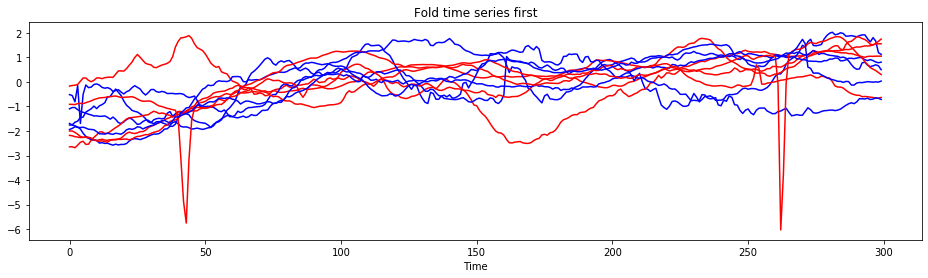

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.42857142857142855
INFO:root:best acc: 0.75
INFO:root:fold: 1
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


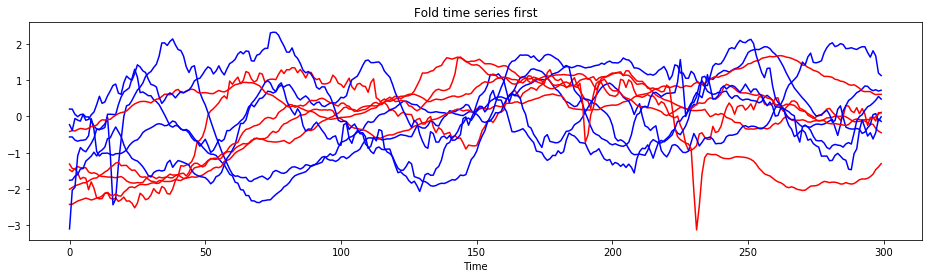

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.875
INFO:root:fold: 2
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


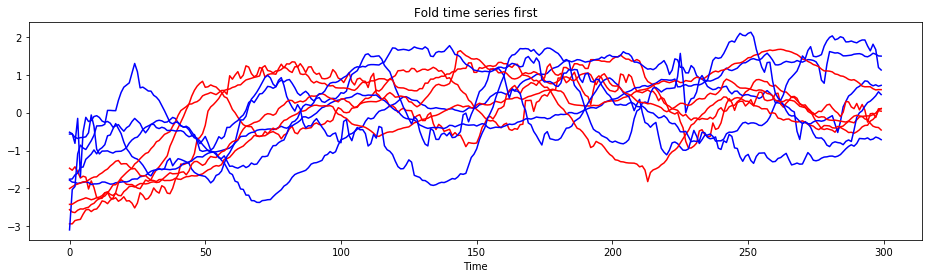

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.625
INFO:root:fold: 3
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


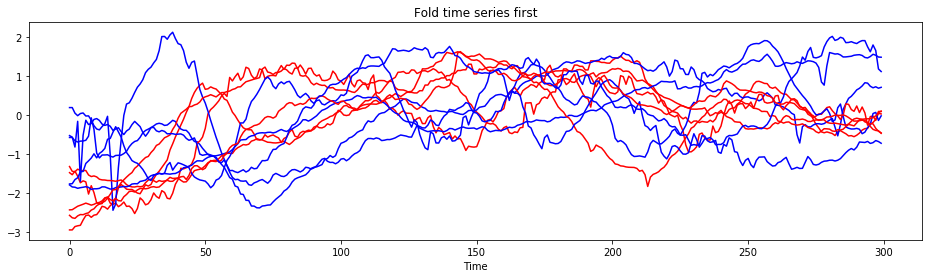

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.5
INFO:root:fold: 4
INFO:root:(array(['0', '1'], dtype=object), array([15, 16]))
INFO:root:displaying first 5 samples for each class


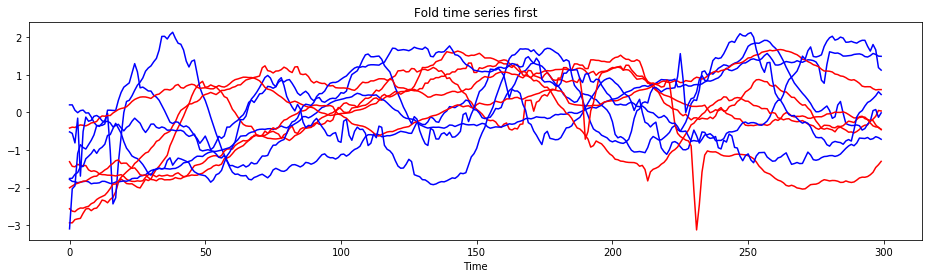

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.14285714285714285
INFO:root:fold: 5
INFO:root:(array(['0', '1'], dtype=object), array([16, 15]))
INFO:root:displaying first 5 samples for each class


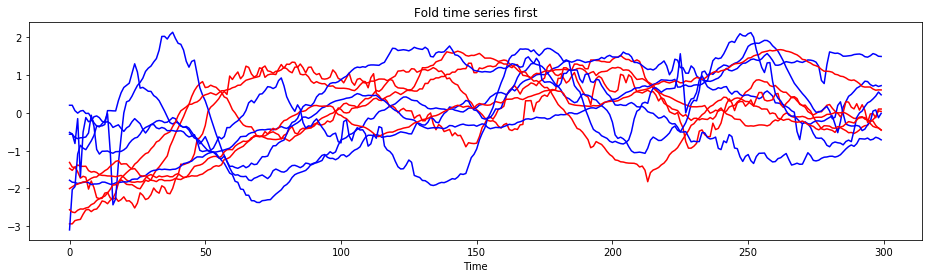

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.2857142857142857
INFO:root:best acc: 0.88
INFO:root:fold: 1
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


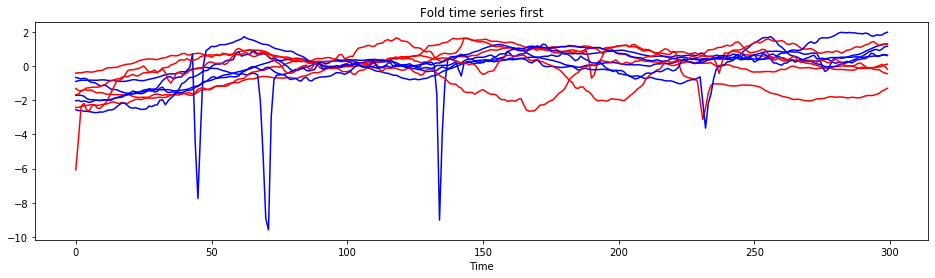

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.75
INFO:root:fold: 2
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


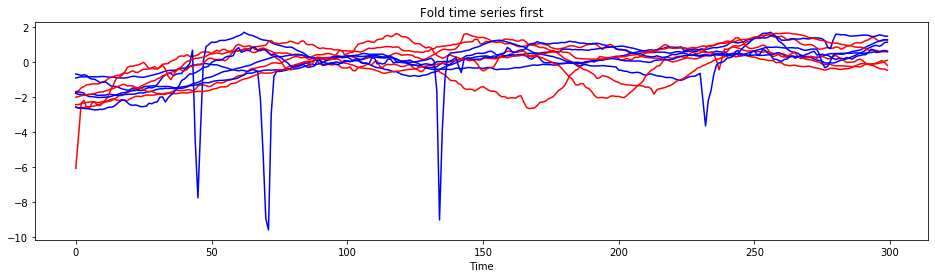

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.625
INFO:root:fold: 3
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


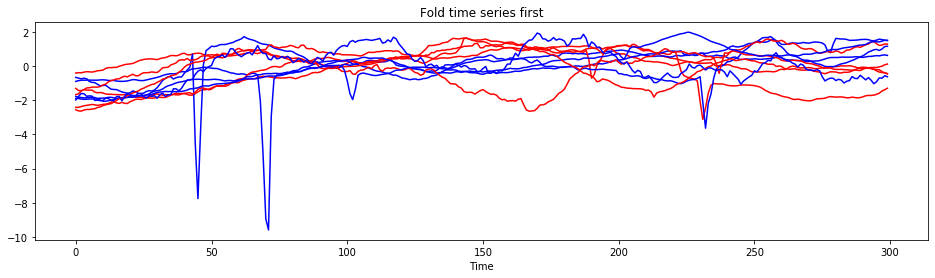

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.375
INFO:root:fold: 4
INFO:root:(array(['0', '1'], dtype=object), array([15, 16]))
INFO:root:displaying first 5 samples for each class


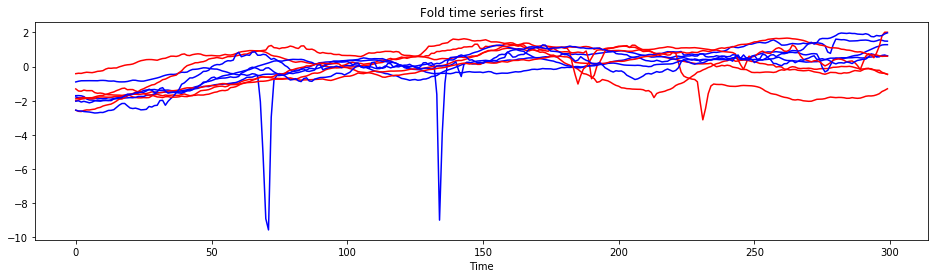

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.5714285714285714
INFO:root:fold: 5
INFO:root:(array(['0', '1'], dtype=object), array([16, 15]))
INFO:root:displaying first 5 samples for each class


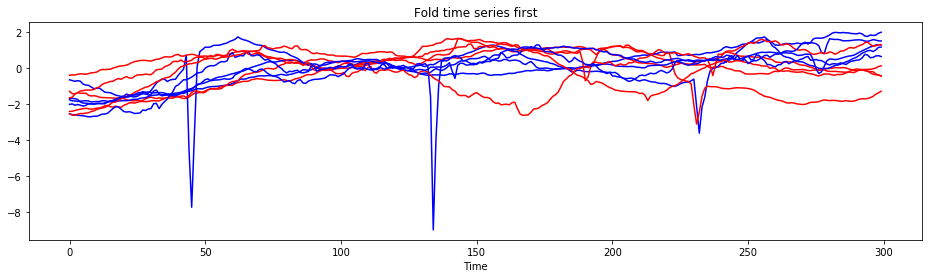

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.5714285714285714
INFO:root:best acc: 0.75
INFO:root:fold: 1
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


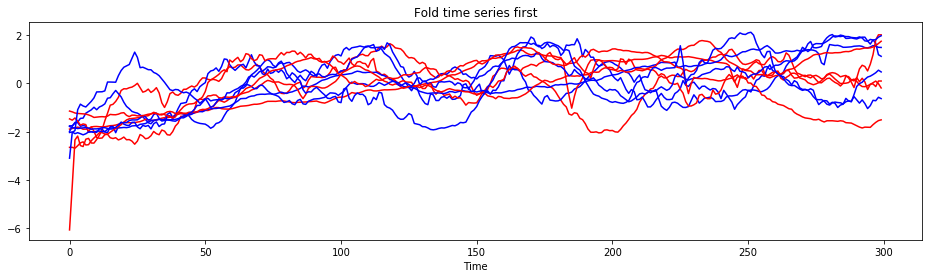

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.625
INFO:root:fold: 2
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


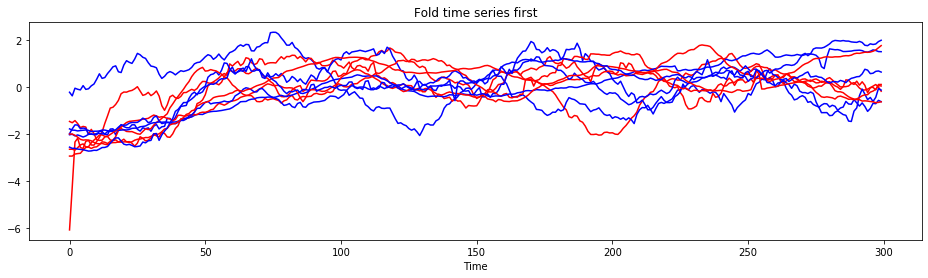

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.625
INFO:root:fold: 3
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


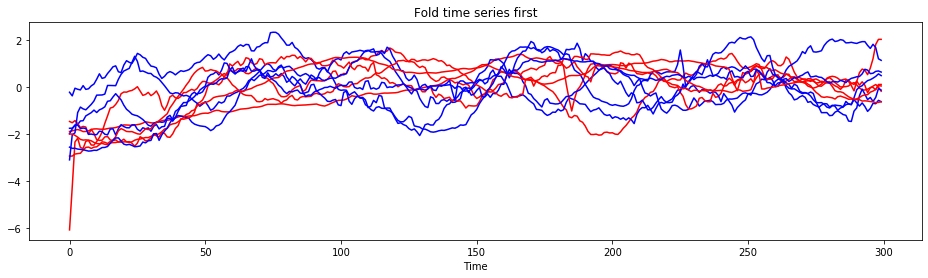

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.5
INFO:root:fold: 4
INFO:root:(array(['0', '1'], dtype=object), array([15, 16]))
INFO:root:displaying first 5 samples for each class


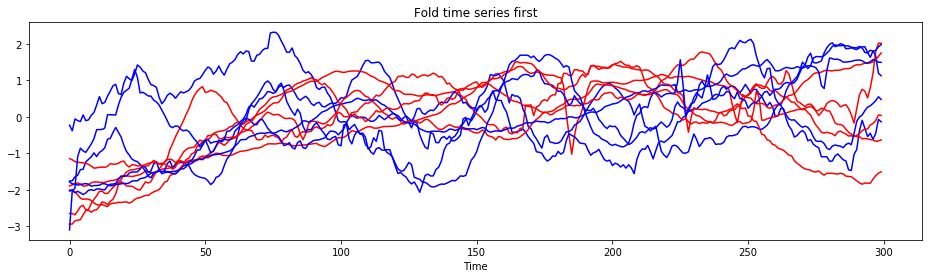

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.5714285714285714
INFO:root:fold: 5
INFO:root:(array(['0', '1'], dtype=object), array([16, 15]))
INFO:root:displaying first 5 samples for each class


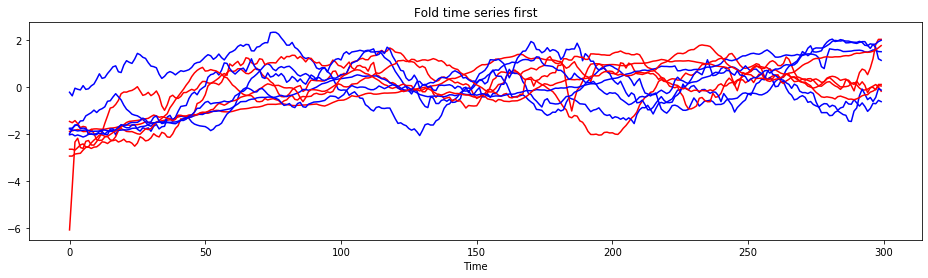

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.7142857142857143
INFO:root:best acc: 0.71
INFO:root:fold: 1
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


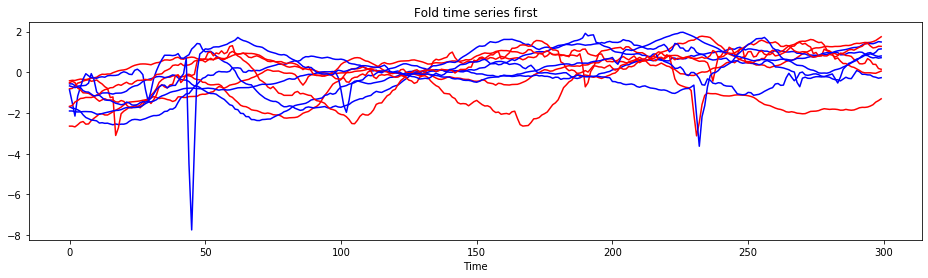

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.5
INFO:root:fold: 2
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


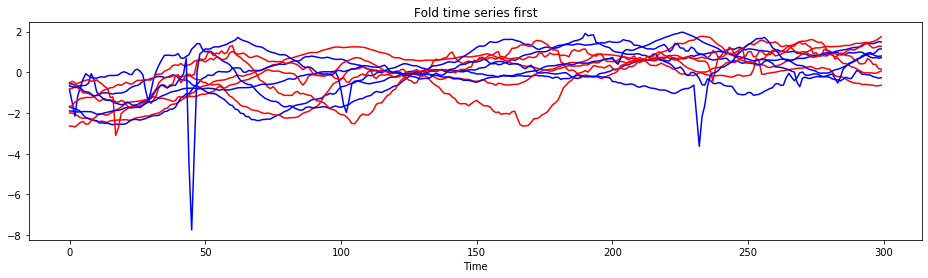

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.625
INFO:root:fold: 3
INFO:root:(array(['0', '1'], dtype=object), array([15, 15]))
INFO:root:displaying first 5 samples for each class


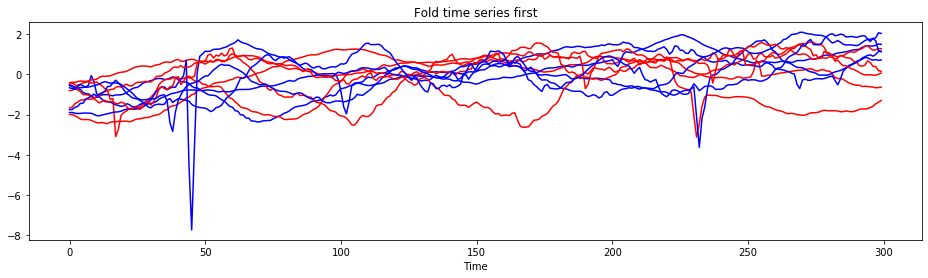

INFO:root:Dummy score: 0.5
INFO:root:random forest score: 0.25
INFO:root:fold: 4
INFO:root:(array(['0', '1'], dtype=object), array([15, 16]))
INFO:root:displaying first 5 samples for each class


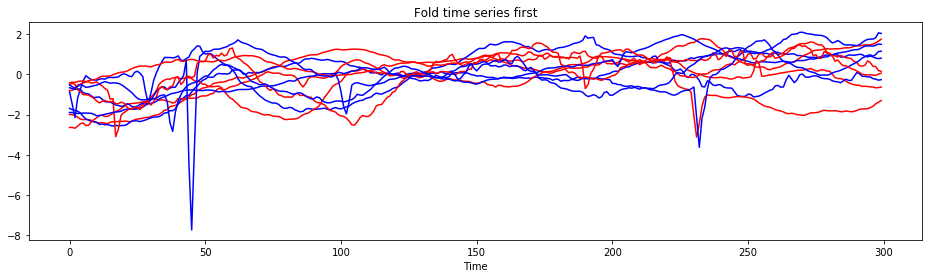

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.7142857142857143
INFO:root:fold: 5
INFO:root:(array(['0', '1'], dtype=object), array([16, 15]))
INFO:root:displaying first 5 samples for each class


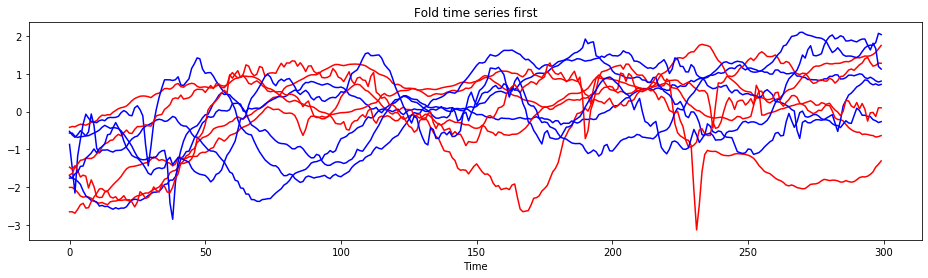

INFO:root:Dummy score: 0.42857142857142855
INFO:root:random forest score: 0.42857142857142855
INFO:root:best acc: 0.71
INFO:root:best global acc: 0.88
INFO:root:              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



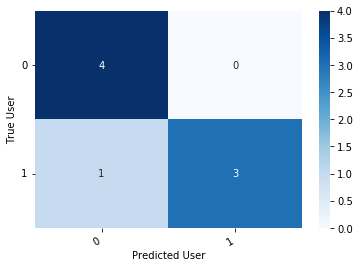

In [7]:
ts_classifier.train(k_folds=5)

#### Extracting Statistical Features

In [7]:
ts_classifier.method = 'feature-extractor'
ts_classifier.train(k_folds=5)

INFO:root:number of samples per class: 19
INFO:root:tuning to obtain the best model (method: feature-extractor, k_folds: 5)...
Feature Extraction: 100%|██████████| 41/41 [00:00<00:00, 783.30it/s]
INFO:root:       relative_pupil_dilation__sum_values  relative_pupil_dilation__median  \
count                            41.000000                        41.000000   
mean                             -0.000059                         0.115089   
std                               0.000439                         0.159348   
min                              -0.001000                        -0.244950   
25%                              -0.000300                        -0.010300   
50%                              -0.000100                         0.145650   
75%                               0.000200                         0.228000   
max                               0.000900                         0.409700   

       relative_pupil_dilation__mean  relative_pupil_dilation__length  \
count    

#### ROCKET Univariate

INFO:root:number of samples per class: 19
INFO:root:tuning to obtain the best model (method: rocket, k_folds: 5)...
INFO:root:loadig MiniRockets! 🚀
INFO:root:total number of samples in X: 38
INFO:root:fold: 1
INFO:root:length a train data: 30
INFO:root:length a test data: 8
INFO:root:accuracy: 0.5
INFO:root:best_score_: -1.2777721200473608
INFO:root:fold: 2
INFO:root:length a train data: 30
INFO:root:length a test data: 8
INFO:root:accuracy: 0.25
INFO:root:best_score_: -1.157122873103559
INFO:root:fold: 3
INFO:root:length a train data: 30
INFO:root:length a test data: 8
INFO:root:accuracy: 0.25
INFO:root:best_score_: -1.0561857721608836
INFO:root:fold: 4
INFO:root:length a train data: 31
INFO:root:length a test data: 7
INFO:root:accuracy: 0.42857142857142855
INFO:root:best_score_: -1.223680894186804
INFO:root:fold: 5
INFO:root:length a train data: 31
INFO:root:length a test data: 7
INFO:root:accuracy: 0.2857142857142857
INFO:root:best_score_: -1.1598941101878089
INFO:root:best acc: 0.5

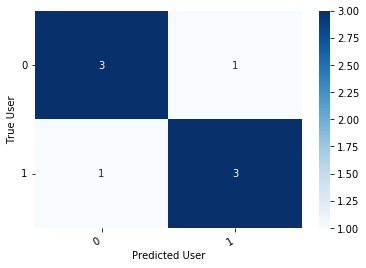

In [8]:
ts_classifier.method = 'rocket'
ts_classifier.train(k_folds=5)

#### ROCKET Multivariate 

In [ ]:
# scores var comes from previous evaluations done in the training loop
# print("number of compared models shuffling the data: ", len(scores))
# print("mean score: ", np.mean(scores))

# Implementation is done, main library needs update